In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Business Problem

Customer churn is one of the most critical challenges faced by subscription-based businesses such as telecommunication companies.  
Churn occurs when a customer decides to leave the service provider, resulting in a direct loss of recurring revenue and often higher costs to acquire new customers compared to retaining existing ones.  

In this dataset, each record represents a customer profile, along with details of their demographics, subscription features, and billing information. The target variable **Churn** indicates whether the customer has left the company or not.  

The business objective is to **develop a predictive model** that can identify customers who are at high risk of churning. By doing so, the company can:  
- Proactively engage with customers likely to leave.  
- Offer personalized retention strategies such as discounts, service upgrades, or support improvements.  
- Reduce overall churn rate, thereby increasing customer lifetime value (CLV) and sustaining long-term profitability.  


# Business Metrics

## Precision vs Recall in Churn Prediction

In this dataset, the positive class (**Churn = Yes**) represents customers who leave.  

- **False Negative (FN)** = Predicting "No Churn" when the customer actually churns → very costly, as the company loses the customer without any retention attempt.  
- **False Positive (FP)** = Predicting "Churn" when the customer actually stays → less costly, as the company may offer retention benefits unnecessarily.  

### Business Priority
Because losing a customer is more expensive than offering unnecessary retention incentives:  
- The model should **prioritize Recall (minimizing FNs)** to capture as many churners as possible.  
- Precision is still important, but secondary, since some false alarms are acceptable in exchange for catching more true churners.  

# Scoring Metrics

- **Recall (Minimize FN) - PRIORITY**  
  Measures how many actual churners are correctly identified, since missing churners (FN) is the costliest business risk.  

- **Precision (Minimize FP)**  
  Measures how many predicted churners are truly churners. less costly than churners but helps monitor wasted retention offers (FP).  

- **F1-Score**  
  Provides a single balanced metric, ensuring we don’t optimize recall at the extreme expense of precision.  

- **ROC-AUC**  
  Measures the model’s ability to separate churners from non-churners across all thresholds.   

- **PR-AUC**  
  Focuses only on the positive (churn) class.  

# Confusion Matrix for Churn Prediction

|                          | **Predicted: No Churn** | **Predicted: Churn** |
|--------------------------|--------------------------|-----------------------|
| **Actual: No Churn**     | **True Negative (TN)**  <br> Correctly predicted non-churners. No retention cost. | **False Positive (FP)**  <br> Predicted churn but customer stays. Extra retention incentive given unnecessarily. |
| **Actual: Churn**        | **False Negative (FN)** <br> Predicted non-churn but customer churns. Very costly — customer is lost with no retention action. | **True Positive (TP)** <br> Correctly predicted churner. Company can act with retention strategy. |


# Features Description

#### access more information here: https://docs.google.com/document/d/1lKnbb02G_f6qYwljdJd6J0Pz4dBqJyXVtojXdpoHtPo/edit?tab=t.0



- **Dependents**: Whether the customer has dependents or not.  
- **Tenure**: Number of months the customer has stayed with the company.  
- **OnlineSecurity**: Whether the customer has online security or not.  
- **OnlineBackup**: Whether the customer has online backup or not.  
- **InternetService**: Whether the client is subscribed to Internet service.  
- **DeviceProtection**: Whether the client has device protection or not.  
- **TechSupport**: Whether the client has tech support or not.  
- **Contract**: Type of contract according to duration.  
- **PaperlessBilling**: Bills issued in paperless form.  
- **MonthlyCharges**: Amount of charge for service on a monthly basis.  
- **Churn**: Whether the customer churns or not.


# Read CSV

In [ ]:
# Define google sheets URL
sheet_url = 'https://docs.google.com/spreadsheets/d/1fTzYOqISpFNb4SkRUG2UO7RX03EXNGjKRj3BgQT1VYk/edit?gid=952051651#gid=952051651'

# Transform google sheets into CSV
sheet_url_csv = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=').replace('/edit#gid=', '/export?format=csv&gid=')

# Transform csv to df
df = pd.read_csv(sheet_url_csv)

# DataFrame information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [ ]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [ ]:
df.describe(include='all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


# Data Cleansing

## Duplicates

In [ ]:
df_new = df.copy()

In [ ]:
# checkk duplicated
df_new.duplicated().sum()

np.int64(77)

In [ ]:
# drop duplicates
df_new.drop_duplicates(inplace = True)

# Save to csv

In [ ]:
from google.colab import files

df_new.to_csv('churn_data_cleaned.csv', index=False)

files.download('churn_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Define features

### Define categorial columns

In [ ]:
cat_cols = df_new[['Dependents','OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','TechSupport','Contract','PaperlessBilling']].copy()
cat_cols.head()

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling
0,Yes,No,No,DSL,Yes,Yes,Month-to-month,Yes
1,No,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes
2,No,Yes,No,DSL,Yes,Yes,Two year,No
3,No,Yes,Yes,DSL,Yes,Yes,Two year,No
4,No,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes


#### Check values inside categorial columns

In [ ]:
for col in cat_cols.columns:
    print(f"\n--- {col} ---")
    print(cat_cols[col].value_counts())


--- Dependents ---
Dependents
No     3380
Yes    1473
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     2420
Yes                    1430
No internet service    1003
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No                     2148
Yes                    1702
No internet service    1003
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    2154
DSL            1696
No             1003
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No                     2162
Yes                    1688
No internet service    1003
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No                     2442
Yes                    1408
No internet service    1003
Name: count, dtype: int64

--- Contract ---
Contract
Month-to-month    2665
Two year          1143
One year          1045
Name: count, dtype: int64

--- PaperlessBilling ---
PaperlessBilling
Yes    2925
No     1928
Name: count, 

##### Categorial columns used

##### Encoding strategy (Business Reasoning)

This encoding strategy is based on whether the categories represent a **natural order or progression** in the business context.  

- **Ordinal Encoding (has a natural progression)**

1. **InternetService** (`No internet service < DSL < Fiber optic`)  
   - Internet services differ in quality and speed.  
   - "No service" means no connectivity, DSL is basic broadband, and Fiber optic is the premium/high-speed option.  
   - There is a clear progression in **service value and quality**, so ordinal encoding is appropriate.  

2. **Contract** (`Month-to-month < One year < Two year`)  
   - Longer contracts indicate higher customer commitment and stability.  
   - A two-year contract has more weight than a one-year, which in turn has more stability than month-to-month.  
   - This progression reflects **loyalty and retention potential**.  

3. **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport** (`No internet service < No < Yes`)  
   - These services are add-ons for internet customers.  
   - **"No internet service"** means the customer does not subscribe to internet, so the add-on is irrelevant (lowest value).  
   - **"No"** means the customer has internet but declined the add-on.  
   - **"Yes"** means the customer opted in, which adds value and reduces churn risk.  
   - Thus, the natural progression is: `No internet service < No < Yes`.  

4. **Dependents** (`No < Yes`)   
   - Mapping `No = 0` and `Yes = 1` reflects the progression from **0 dependents to >=1 dependents**.  

---

- **One-Hot Encoding (no natural progression)**

1. **PaperlessBilling** (`Yes` / `No`)  
   - This is a **preference**, not a hierarchy.  
   - "Yes" (receiving bills online) is not inherently better or worse than "No" (receiving paper bills).  
   - Since there is **no natural order**, one-hot encoding is the correct approach.  


### Define numerical columns

In [ ]:
num_cols = df_new[['tenure','MonthlyCharges']].copy()
num_cols.head()

,tenure,MonthlyCharges
0,9,72.90
1,14,82.65
2,64,47.85
3,72,69.65
4,3,23.60


#### Outliers

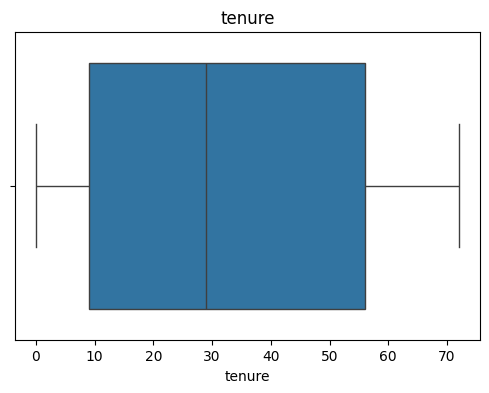

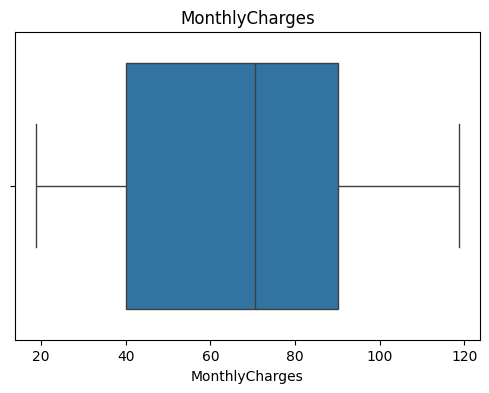

In [ ]:
num_col = ['tenure','MonthlyCharges']

for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_new[col])
    plt.title(col)
    plt.show()

**Insights:**

No outliers found.

#### Data distribution

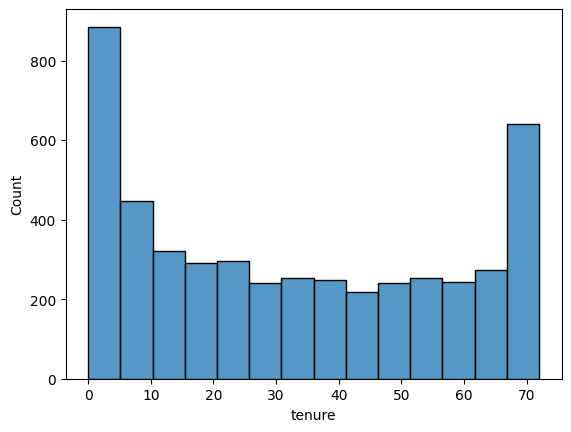

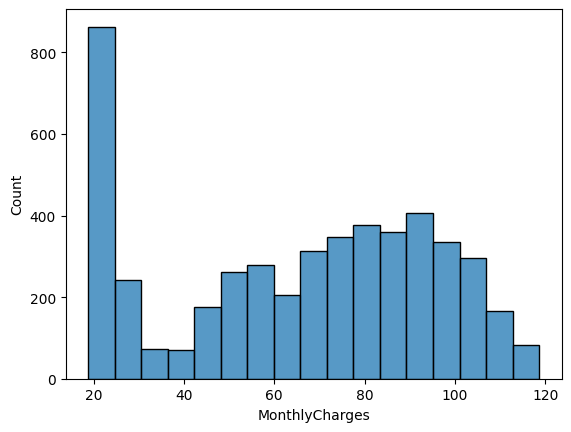

In [ ]:
for i in num_col:
    sns.histplot(df_new[i])
    plt.show()

##### Scaling strategy

Altough both numerical columns do not have outliers, the data distribution seems to have a skewed distribution. Robust Scaler will be used for scaling purposes.

## Define target

In [ ]:
target = df_new['Churn'].copy()

In [ ]:
# check target
target.value_counts()

,count
Churn,
No,3565
Yes,1288


### Map target

In [ ]:
df_new['Churn'] = df_new['Churn'].map({'No': 0, 'Yes': 1})

### Steps for modelling

### Class Imbalance

The target **Churn** is moderately imbalanced:

- **No**: 3,565 (73%)  
- **Yes**: 1,288 (27%)  

This 3:1 ratio means a model predicting only "No" would still achieve ~73% accuracy, but fail to identify churners—the group most critical for business decisions.  

### Handling Imbalance

To address the imbalance, the following techniques can be applied during modeling:  
1. **Resampling Methods**  
   - *Oversampling*: Increase the number of churn samples (e.g., SMOTE).  
   - *Undersampling*: Reduce the number of non-churn samples.  

2. **Class Weights**  
   - Many algorithms (e.g., Logistic Regression, Tree-Based Models, XGBoost (using `sample_weight`) ) allow setting `class_weight='balanced'` to penalize misclassification of churn cases more heavily.  

3. **Threshold Tuning**  
   - Adjusting the decision threshold (from 0.5 to a lower value) can improve recall for churn prediction.

# EDA

## Univariate analysis

### Numerical columns

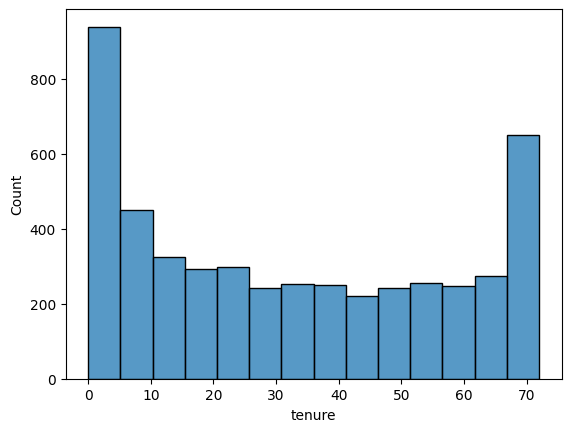

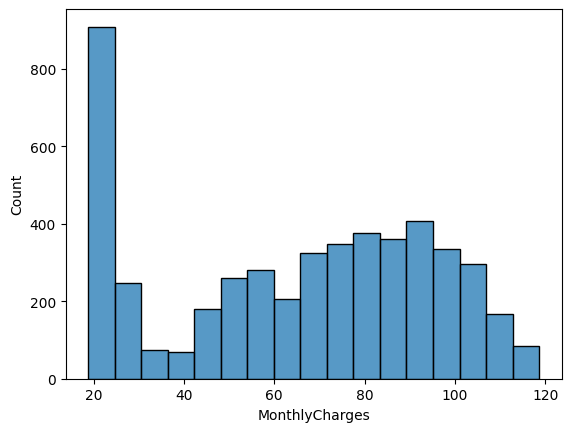

In [ ]:
for i in num_cols:
    sns.histplot(df[i])
    plt.show()

### Categorial columns

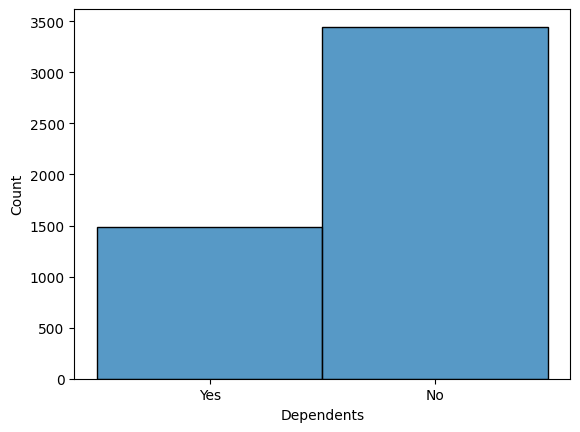

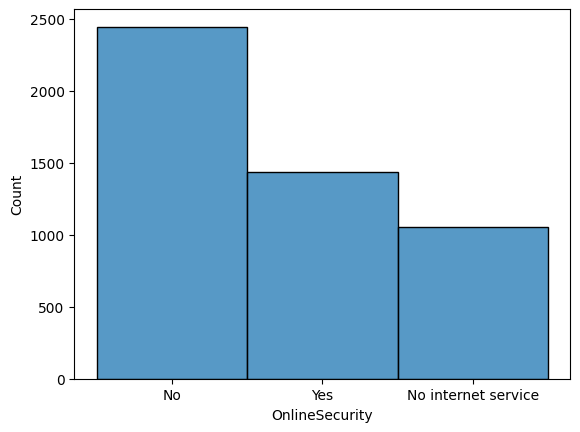

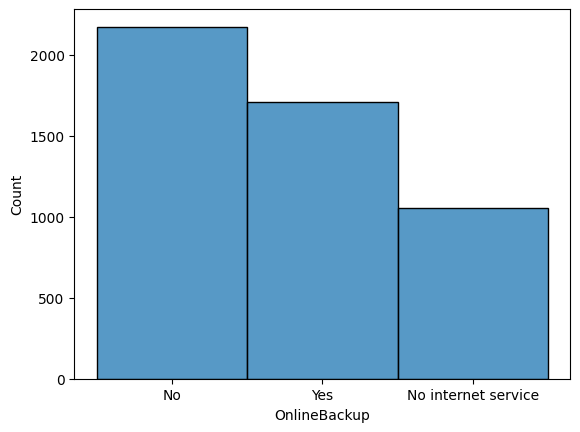

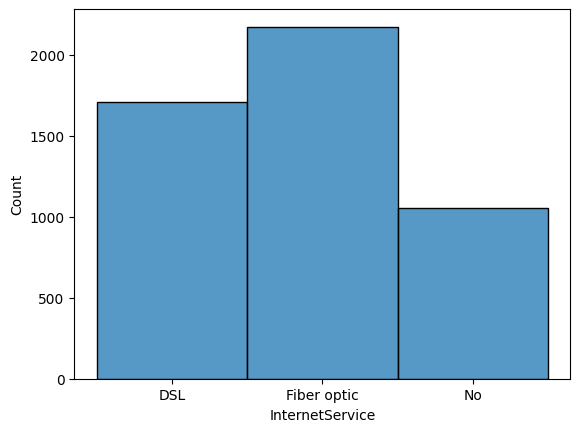

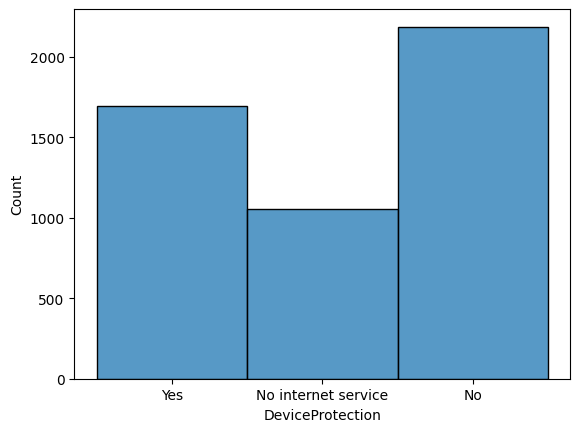

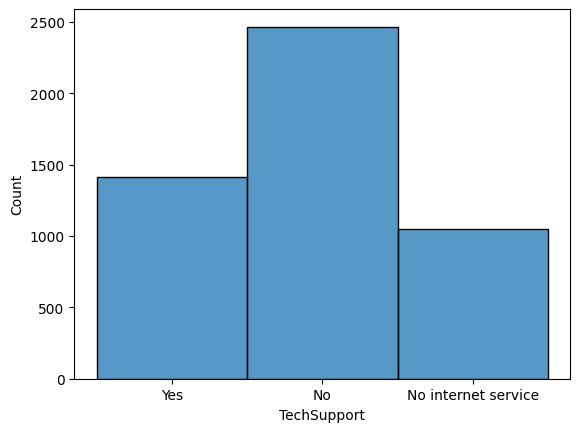

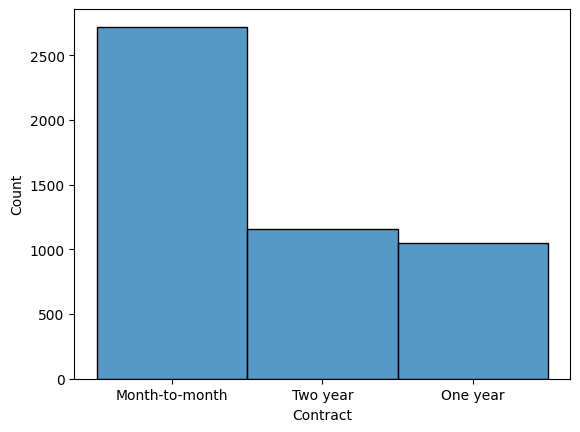

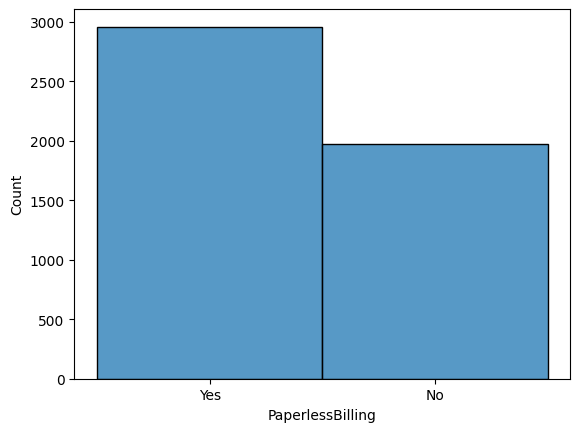

In [ ]:
for i in cat_cols:
    sns.histplot(df[i])
    plt.show()

## Bivariate analysis

### Numerical columns

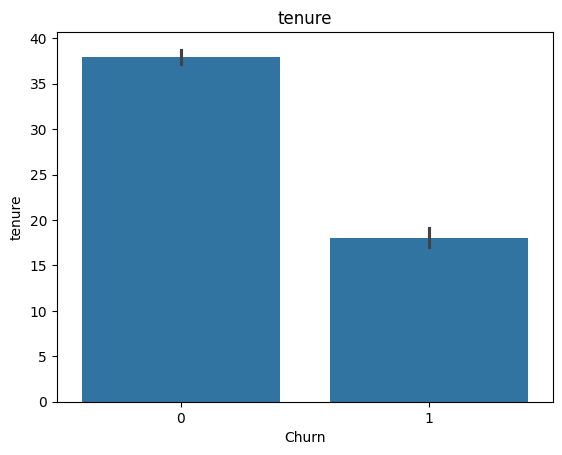

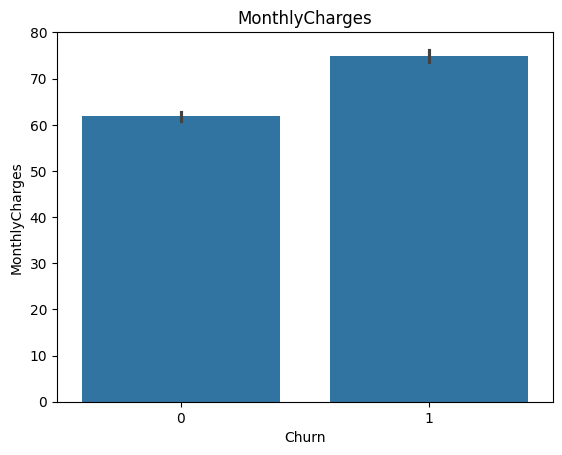

In [ ]:
for i in num_cols:
    sns.barplot(data = df_new, x='Churn', y = i)
    plt.title(i)
    plt.show()

**Insights:**

1. **Tenure**  
   - Customers who churned have a **much lower average tenure** (~18 months).
     
   - Customers who stayed have a **longer average tenure** (~38 months).  
   - Insight: Newer customers are more likely to churn, while long-term customers tend to stay loyal.  

2. **Monthly Charges**  
   - Customers who churned pay **higher average monthly charges** (~$75)

   - Customers who stayed pay **lower average monthly charges** (~$61)  
   - Insight: High service costs are associated with higher churn, possibly due to price sensitivity.  

---

**Overall Pattern**  
- **High-risk churn group** = customers with **short tenure** and **high monthly charges**.  
- This suggests the company should focus on:  
  - Retention strategies for new customers (e.g., onboarding support, early discounts).  
  - Addressing price sensitivity among high-paying customers.  


### Categorial columns

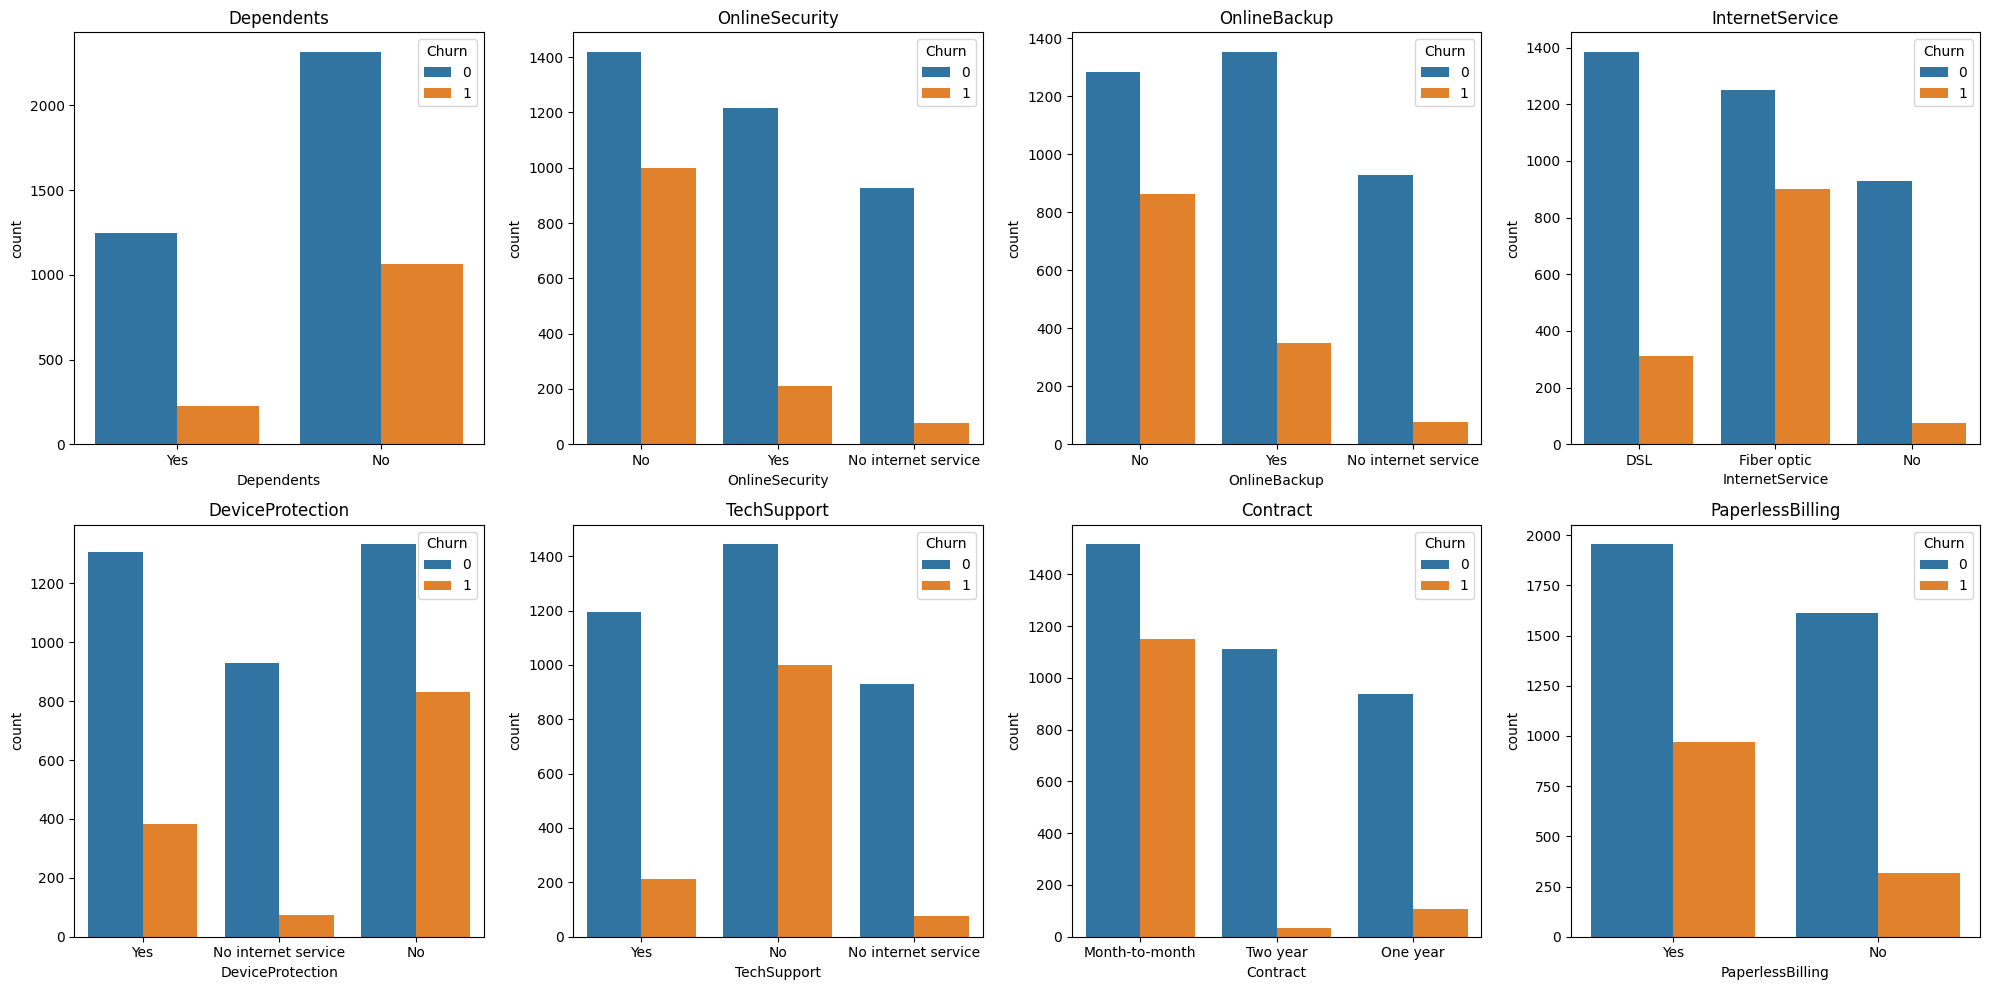

In [ ]:
# Number of categorical features
n_cols = len(cat_cols.columns)

# Set number of rows and columns for subplots
rows = 2
cols = 4
plt.figure(figsize=(20, 10))

for i, col in enumerate(cat_cols.columns):
    plt.subplot(rows, cols, i+1)
    sns.countplot(data=df_new, x=col, hue='Churn')
    plt.title(col)

plt.tight_layout()
plt.show()

**Insights:**


1. **Dependents**  
   - Customers **without dependents** have a higher churn rate.  
   - Customers with dependents are more loyal and less likely to leave.  

2. **Online Security**  
   - Customers **without online security** churn significantly more.  
   - Providing security services could help reduce churn.  

3. **Online Backup**  
   - Customers without backup show higher churn, though the effect is weaker compared to security.  

4. **Internet Service**  
   - **Fiber optic users** churn more compared to DSL users.  
   - Customers with **no internet service** rarely churn.  

5. **Device Protection**  
   - Customers **without device protection** show higher churn.  

6. **Tech Support**  
   - Customers **without tech support** churn heavily.  
   - Having tech support correlates with much lower churn.  

7. **Contract Type**  
   - **Month-to-month** customers churn the most.  
   - **One-year and Two-year** contract customers are more stable.  

8. **Paperless Billing**  
   - Customers with **paperless billing** show higher churn compared to those receiving paper bills.  
   - Digitally engaged customers may be more price-sensitive and quick to switch.  

---

**Overall Pattern**  
- Lack of **value-added services** (security, backup, device protection, support) increases churn.  
- **Month-to-month contracts** are strongly linked to higher churn.  
- Customers with **dependents** and longer **contracts** are more loyal.  

## Multivariate analysis

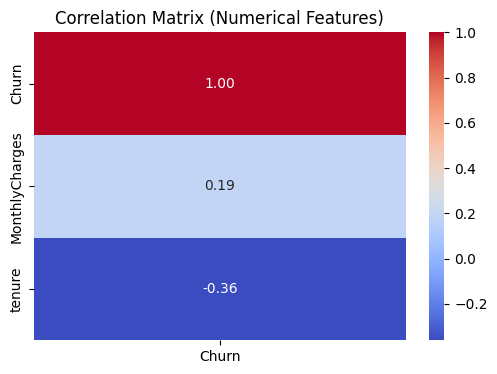

In [ ]:
# Compute correlation matrix
corr = df_new[['tenure','MonthlyCharges','Churn']].corr()['Churn'].sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

# Define X and y

In [ ]:
X = df_new.drop(columns = 'Churn')
y = df_new['Churn']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4929
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 417.1+ KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 4853 entries, 0 to 4929
Series name: Churn
Non-Null Count  Dtype
--------------  -----
4853 non-null   int64
dtypes: int64(1)
memory usage: 75.8 KB


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size = 0.2, # data test proportion
                                    random_state = 42, # lock randomized test
                                    stratify = y) # split by y

# Column Transformer

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler

In [ ]:
ord_cols = ['Dependents','OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','TechSupport','Contract']
cat_cols = ['PaperlessBilling']
sca_cols = ['tenure','MonthlyCharges']

In [ ]:
# column groups
ord_cols = ['Dependents','OnlineSecurity','OnlineBackup','InternetService',
            'DeviceProtection','TechSupport','Contract']
cat_cols = ['PaperlessBilling']
num_cols = ['tenure','MonthlyCharges']

# numerical pipeline
num_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# categorical (nominal) pipeline
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ord_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[
        ['No', 'Yes'],                                      # Dependents
        ['No internet service', 'No', 'Yes'],               # OnlineSecurity
        ['No internet service', 'No', 'Yes'],               # OnlineBackup
        ['No', 'DSL', 'Fiber optic'],                       # InternetService
        ['No internet service', 'No', 'Yes'],               # DeviceProtection
        ['No internet service', 'No', 'Yes'],               # TechSupport
        ['Month-to-month', 'One year', 'Two year']          # Contract
    ]))
])

# combine everything
ct = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),       # numeric
    ('cat', cat_pipeline, cat_cols),       # nominal categorical
    ('ord', ord_pipeline, ord_cols)        # ordinal categorical
])

# Modeling

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Model Benchmarking with class_weight='balanced'

#### Models chosen

In [ ]:
models = {
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "ExtraTrees":   ExtraTreesClassifier(class_weight='balanced', random_state=42),
    "XGBoost":      XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
                                  use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM":     LGBMClassifier(class_weight='balanced', random_state=42),
    "LogReg-Ridge": LogisticRegression(penalty="l2", class_weight='balanced', solver="lbfgs", max_iter=2000, random_state=42),
    "LogReg-Lasso": LogisticRegression(penalty="l1", class_weight='balanced', solver="liblinear", max_iter=2000, random_state=42),
    "LogReg-Elastic": LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, class_weight='balanced', max_iter=2000, random_state=42)}

#### CV schema

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
results = []

for name, models in models.items():
    pipe = ImbPipeline([
        ("preprocess", ct),
        ("model", models)
    ])

    cv = cross_validate(
        pipe, X_train, y_train,
        cv=skf, n_jobs=-1,
        scoring={
            "recall": "recall",
            "precision": "precision",
            "f1": "f1",
            "roc_auc": "roc_auc"
        }
    )

    results.append({
        "Model": name,
        "CV Recall":     cv["test_recall"].mean(),
        "CV Precision":  cv["test_precision"].mean(),
        "CV F1":         cv["test_f1"].mean(),
        "CV ROC-AUC":    cv["test_roc_auc"].mean()
    })

#### Cross validation result

In [ ]:
cv_results = pd.DataFrame(results).sort_values("CV Recall", ascending=False)

In [ ]:
cv_results

,Model,CV Recall,CV Precision,CV F1,CV ROC-AUC
6,LogReg-Lasso,0.803883,0.507851,0.622366,0.838452
5,LogReg-Ridge,0.802913,0.507855,0.622076,0.838399
7,LogReg-Elastic,0.802913,0.508457,0.622531,0.838365
4,LightGBM,0.718447,0.527074,0.607668,0.826902
3,XGBoost,0.655340,0.538565,0.590928,0.813752
2,ExtraTrees,0.464078,0.549942,0.502791,0.766943
1,RandomForest,0.444660,0.582634,0.503918,0.801618
0,DecisionTree,0.442718,0.471969,0.456372,0.632079


#### Predict on data test

In [ ]:
best_model1 = LogisticRegression(penalty="l2", class_weight='balanced', solver="lbfgs", max_iter=2000, random_state=42)

In [ ]:
pipe = ImbPipeline([
    ("preprocess", ct),
    ("model", best_model1)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

#### Data test result

In [ ]:
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))

Recall: 0.8062015503875969
Precision: 0.5148514851485149
F1: 0.6283987915407855
ROC-AUC: 0.8401774356632636
PR-AUC: 0.6339768516331816


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Best 3 model Benchmarking with class_weight='balanced'

#### Models chosen

In [ ]:
models = {
    "LogReg-Ridge": LogisticRegression(penalty="l2", class_weight='balanced', solver="lbfgs", max_iter=2000, random_state=42),
    "LogReg-Lasso": LogisticRegression(penalty="l1", class_weight='balanced', solver="liblinear", max_iter=2000, random_state=42),
    "LogReg-Elastic": LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, class_weight='balanced', max_iter=2000, random_state=42)}

#### CV schema

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
results = []

for name, models in models.items():
    pipe = ImbPipeline([
        ("preprocess", ct),
        ("model", models)
    ])

    cv = cross_validate(
        pipe, X_train, y_train,
        cv=skf, n_jobs=-1,
        scoring={
            "recall": "recall",
            "precision": "precision",
            "f1": "f1",
            "roc_auc": "roc_auc"
        }
    )

    results.append({
        "Model": name,
        "CV Recall":     cv["test_recall"].mean(),
        "CV Precision":  cv["test_precision"].mean(),
        "CV F1":         cv["test_f1"].mean(),
        "CV ROC-AUC":    cv["test_roc_auc"].mean()
    })

#### Cross validation result

In [ ]:
cv_results = pd.DataFrame(results).sort_values("CV Recall", ascending=False)

In [ ]:
cv_results

,Model,CV Recall,CV Precision,CV F1,CV ROC-AUC
1,LogReg-Lasso,0.803883,0.507851,0.622366,0.838452
0,LogReg-Ridge,0.802913,0.507855,0.622076,0.838399
2,LogReg-Elastic,0.802913,0.508457,0.622531,0.838365


**Conclusion:**
Lasso Logistic Regression (L1) was chosen because it delivers strong recall performance (minimizing costly False Negatives) while also providing **feature selection and interpretability**, making it the best fit for both predictive performance and business usability.

**Best model to use:**

#### Predict on data test

In [ ]:
best_model1 = LogisticRegression(penalty="l1", class_weight='balanced', solver="liblinear", max_iter=2000, random_state=42)

In [ ]:
pipe = ImbPipeline([
    ("preprocess", ct),
    ("model", best_model1)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

#### Data test result

In [ ]:
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))

Recall: 0.8062015503875969
Precision: 0.5135802469135803
F1: 0.6274509803921569
ROC-AUC: 0.840351392195875
PR-AUC: 0.6350585892825743


### Model Benchmarking with resampling

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#### Models

In [ ]:
models = {
    "LogReg-Ridge": LogisticRegression(penalty="l2", class_weight='balanced', solver="lbfgs", max_iter=2000, random_state=42),
    "LogReg-Lasso": LogisticRegression(penalty="l1", class_weight='balanced', solver="liblinear", max_iter=2000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "ExtraTrees":   ExtraTreesClassifier(class_weight='balanced', random_state=42),
    "XGBoost":      XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM":     LGBMClassifier(class_weight='balanced', random_state=42)
}

#### Resampler

In [ ]:
resamplers = {
    "ROS": RandomOverSampler(random_state=42),
    "RUS": RandomUnderSampler(random_state=42),
    "NearMiss": NearMiss(version=1),
    "SMOTE": SMOTE(random_state=42),
}

#### CV schema

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
for model_name, model in models.items():
    for res_name, resampler in resamplers.items():
        pipe = ImbPipeline([
            ("preprocess", ct),
            ("resample",   resampler),
            ("model",      model)
        ])

        cv = cross_validate(
            pipe, X_train, y_train,
            cv=skf, n_jobs=-1,
            scoring={
                "recall": "recall",
                "precision": "precision",
                "f1": "f1",
                "roc_auc": "roc_auc"
            }
        )

        results.append({
            "Model":        model_name,
            "Resampler":    res_name,
            "CV Recall":    cv["test_recall"].mean(),
            "CV Precision": cv["test_precision"].mean(),
            "CV F1":        cv["test_f1"].mean(),
            "CV ROC-AUC":   cv["test_roc_auc"].mean()
        })

#### Cross validation result

In [ ]:
cv_results = pd.DataFrame(results).sort_values("CV Recall", ascending=False)

In [ ]:
cv_results

,Model,CV Recall,CV Precision,CV F1,CV ROC-AUC,Resampler
1,LogReg-Lasso,0.803883,0.507851,0.622366,0.838452,NaN
0,LogReg-Ridge,0.802913,0.507855,0.622076,0.838399,NaN
2,LogReg-Elastic,0.802913,0.508457,0.622531,0.838365,NaN
8,LogReg-Lasso,0.800971,0.506078,0.620089,0.839447,RUS
4,LogReg-Ridge,0.799029,0.506343,0.619718,0.839385,RUS
7,LogReg-Lasso,0.799029,0.506037,0.619556,0.838506,ROS
3,LogReg-Ridge,0.798058,0.506045,0.619267,0.838444,ROS
10,LogReg-Lasso,0.797087,0.512380,0.623644,0.838240,SMOTE
6,LogReg-Ridge,0.796117,0.513077,0.623852,0.838271,SMOTE
28,LightGBM,0.757282,0.492762,0.596814,0.818595,RUS


**Conclusion:**

Lasso Logistic Regression (L1) is still the best performer out of all model. On top of that Lasso (`class_weight='balanced'`) without any resampler seems to be the best performer in all scoring metrics. Therefore, Lasso  (`class_weight='balanced'`) will be used in further tuning.

#### Predict on data test

In [ ]:
best_resampler = RandomUnderSampler(random_state=42)

In [ ]:
pipe = ImbPipeline([
    ("preprocess", ct),
    ("resample",   best_resampler),
    ("model", best_model1)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

#### Data test result

In [ ]:
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))

Recall: 0.7984496124031008
Precision: 0.511166253101737
F1: 0.6232980332829047
ROC-AUC: 0.842183371929939
PR-AUC: 0.6441151577511565


### Model benchmarking with LogReg Lasso balanced weight and threshold favoring recall (< 0.5)

##### Model

In [ ]:
best_model = LogisticRegression(penalty="l1", class_weight='balanced', solver="liblinear", max_iter=2000, random_state=42)
pipe = Pipeline([('transformer', ct), ('model', best_model)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PaperlessBilling']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No '
                                                                                               'internet '
                                                                                               'service',
                                                                                               'No',
                                                                                               'Yes']...
                                                                                              ['No '
                                                                                               'internet '
                                                                                               'service',
                                                                                               'No',
                                                                                               'Yes'],
                                                                                              ['No '
                                                                                               'internet '
                                                                                               'service',
                                                                                               'No',
                                                                                               'Yes'],
                                                                                              ['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'Contract'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

#### Threshold tuning and predict on data train

In [ ]:
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

#### Data test result

In [ ]:
print("Recall:", recall_score(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh))
print("F1:", f1_score(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))

Recall: 0.9186046511627907
Precision: 0.42857142857142855
F1: 0.5844636251541308
ROC-AUC: 0.842183371929939
PR-AUC: 0.6441151577511565


In [ ]:
recall_default = recall_score(y_test, y_pred_thresh)

### Model benchmarking with LogReg Lasso balanced weight and looping to find best threshold (0.2 - 0.5)

##### Define threshold

In [ ]:
thresholds = np.arange(0.2, 0.5, 0.05)

In [ ]:
results = []
for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    results.append({
        "Threshold": round(t, 2),
        "Recall": recall_score(y_test, y_pred_thresh),
        "Precision": precision_score(y_test, y_pred_thresh),
        "F1": f1_score(y_test, y_pred_thresh),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

##### Data test result

In [ ]:
df_results = pd.DataFrame(results)
df_results

,Threshold,Recall,Precision,F1,ROC-AUC,PR-AUC
0,0.20,0.945736,0.394184,0.556442,0.842183,0.644115
1,0.25,0.934109,0.414089,0.573810,0.842183,0.644115
2,0.30,0.918605,0.433272,0.588820,0.842183,0.644115
3,0.35,0.899225,0.450485,0.600259,0.842183,0.644115
4,0.40,0.875969,0.465021,0.607527,0.842183,0.644115
5,0.45,0.868217,0.492308,0.628331,0.842183,0.644115


##### **Threshold Selection: 0.25**

**Scoring Metrics**
- **Recall:** 0.934  
- **Precision:** 0.414  
- **F1 Score:** 0.574  
- **ROC-AUC:** 0.842  
- **PR-AUC:** 0.644  

---

1. **High Recall Priority**  
   - Recall reaches **93.4%**, meaning the model successfully captures nearly all churners.  
   - This supports the business goal of minimizing missed churners (minimizing FPs).

2. **Trade-off with Precision**  
   - Precision drops slightly (51.3% -> 41.4%), but this is acceptable given the significant gain in recall.  
   - More false positives are expected, but the model still maintains a reasonable balance.

3. **Business Implications**  
   - False positives (loyal customers flagged as churners) lead to unnecessary retention actions.
   - If retention strategies are **low-cost (emails, SMS, loyalty nudges)**, the cost of false positives is limited.  
   - The benefit of preventing actual churn outweighs the downside of a few unnecessary interventions.

---

**Business Justification**
- Retention is typically cheaper than acquiring new customers.  
- Catching almost all churners ensures maximum protection against customer loss.  
- Given the business priority of reducing churn, the slight precision sacrifice is justified.  

---

**Summary**

We adopt **threshold = 0.25**, prioritizing **recall over precision**, since the goal is to **catch as many churners as possible** while tolerating a manageable level of false positives.


### Hyperparameter Tuning with LogReg Lasso, balance weight, threshold = 0.25

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

##### Define tuned pipeline

In [ ]:
pipe_tune = Pipeline([('transformer', ct), ('model', best_model1)])

##### Set parameter for LogReg Lasso (L1)

In [ ]:
# set parameter
param_grid = {
    'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1'],
    'model__solver': ['liblinear'],
    'model__class_weight': ['balanced'],
    'model__max_iter': [2000]
}

In [ ]:
rand = RandomizedSearchCV(
    estimator=pipe_tune,
    param_distributions=param_grid,
    n_iter=50,
    cv=skf,
    n_jobs=-1,
    random_state=42,
    scoring='recall'
)

rand.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                RobustScaler())]),
                                                                               ['tenure',
                                                                                'MonthlyCharges']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['PaperlessBilling']),
                                                                              ('ord',
                                                                               Pipeline(steps...
                                             ('model',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=2000,
                                                                 penalty='l1',
                                                                 random_state=42,
                                                                 solver='liblinear'))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__C': [0.0001, 0.001, 0.01, 0.1,
                                                     1, 10, 100],
                                        'model__class_weight': ['balanced'],
                                        'model__max_iter': [2000],
                                        'model__penalty': ['l1'],
                                        'model__solver': ['liblinear']},
                   random_state=42, scoring='recall')

##### Best parameter

In [ ]:
rand.best_params_

{'model__solver': 'liblinear',
 'model__penalty': 'l1',
 'model__max_iter': 2000,
 'model__class_weight': 'balanced',
 'model__C': 0.01}

##### Best cross validation score (recall)

In [ ]:
rand.best_score_

np.float64(0.8902912621359225)

##### Fitting data train with best pipe

In [ ]:
best_pipe_tuned = rand.best_estimator_
best_pipe_tuned.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PaperlessBilling']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No '
                                                                                               'internet '
                                                                                               'service',
                                                                                               'No',
                                                                                               'Yes']...
                                                                                               'internet '
                                                                                               'service',
                                                                                               'No',
                                                                                               'Yes'],
                                                                                              ['No '
                                                                                               'internet '
                                                                                               'service',
                                                                                               'No',
                                                                                               'Yes'],
                                                                                              ['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'Contract'])])),
                ('model',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=2000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

##### Define threshold

In [ ]:
proba = best_pipe_tuned.predict_proba(X_test)[:, 1]
threshold = 0.25
pred = (proba >= threshold).astype(int)

##### Data test result with best parameters

In [ ]:
print("Recall:", recall_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("F1:", f1_score(y_test, pred))
print("ROC-AUC:", roc_auc_score(y_test, proba))
print("PR-AUC:", average_precision_score(y_test, proba))

Recall: 0.9534883720930233
Precision: 0.3649851632047478
F1: 0.5278969957081545
ROC-AUC: 0.8358230862063343
PR-AUC: 0.6381501959608866


##**Final Decision**

By tuning for recall, the model found parameters that maximize recall aggressively, but at the cost of precision and F1. Therefore, the model before tuning is the best choice for this business case.

Best model:
---
**LogisticRegression(penalty="l1", class_weight='balanced', solver="liblinear", max_iter=2000, random_state=42)**

Best resampler:
---
None

Best threshold:
---
**0.25**

Best parameter:
---
Default

# Feature Importance (coef)

In [ ]:
# Extract the best logistic regression model from your pipeline
best_model = rand.best_estimator_.named_steps['model']

# Get feature names (depends on how you encoded them in pipeline)
feature_names = rand.best_estimator_.named_steps['transformer'].get_feature_names_out()

# Get coefficients
coefs = best_model.coef_[0]

# Put into DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Abs_Coefficient': np.abs(coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

feat_imp.head(10)

,Feature,Coefficient,Abs_Coefficient
10,ord__Contract,-1.148832,1.148832
7,ord__InternetService,0.416092,0.416092
0,num__tenure,-0.378135,0.378135
2,cat__PaperlessBilling_No,-0.075913,0.075913
1,num__MonthlyCharges,0.031532,0.031532
3,cat__PaperlessBilling_Yes,0.000000,0.000000
4,ord__Dependents,0.000000,0.000000
6,ord__OnlineBackup,0.000000,0.000000
5,ord__OnlineSecurity,0.000000,0.000000
8,ord__DeviceProtection,0.000000,0.000000


# Interpretation of Features Importance using Odds Ratio from Coefficient

In [ ]:
odds_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "Odds_Ratio": np.exp(coefs)
})

odds_df[odds_df['Coefficient'] != 0].sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient,Odds_Ratio
7,ord__InternetService,0.416092,1.516025
1,num__MonthlyCharges,0.031532,1.032035
2,cat__PaperlessBilling_No,-0.075913,0.926897
0,num__tenure,-0.378135,0.685138
10,ord__Contract,-1.148832,0.317007


# Churn Odds Ratio Interpretation

| Feature            | Coefficient | Odds Ratio | Interpretation |
|--------------------|-------------|------------|----------------|
| **Contract** (`Month-to-month < One year < Two year`) | -1.15 | 0.32 | Each step to a longer contract reduces churn odds by ~68%. |
| **InternetService** (`No < DSL < Fiber optic`) | +0.42 | 1.52 | Each step up increases churn odds by 52%. |
| **Tenure** (month) | -0.38 | 0.68 | Each unit increase in tenure reduces churn odds by ~32%.  |
| **Paperless Billing (No)** | -0.08 | 0.93 | Customers receiving paper bills are ~7% less likely to churn. Effect is weak compared to Contract or InternetService. |
| **Monthly Charges** | +0.03 | 1.03 | Each unit increase in charges raises churn odds by ~3%. Effect is small, but higher-charge customers may still be more price-sensitive. |
| **Other Features** (Dependents, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) | 0.00 | 1.00 | Dropped by Lasso → no predictive effect once stronger drivers are included.  


# Business Takeaways
- **Contract type** is the strongest churn driver → prioritize converting month-to-month customers to longer contracts.  
- **Internet service type** matters → Fiber customers churn more. Since monthly charges is not a big driver, the service itself might be the problem.  
- **Tenure is protective** → focus retention strategies on new customers.  
- **Billing and monthly charges** have smaller effects, but still useful for targeted offers.

## Save Model

In [ ]:
import joblib

In [ ]:
joblib.dump(pipe, 'Model_ChurnPrediction.joblib')

['Model_ChurnPrediction.joblib']

# Load Model

In [ ]:
load = joblib.load('Model_ChurnPrediction.joblib')

# Test on new data

In [ ]:
test_data = pd.DataFrame({
    "Dependents": ["No", "Yes", "No"],
    "OnlineSecurity": ["No", "Yes", "No internet service"],
    "OnlineBackup": ["Yes", "No", "No internet service"],
    "InternetService": ["Fiber optic", "DSL", "No"],
    "DeviceProtection": ["Yes", "No", "No internet service"],
    "TechSupport": ["No", "Yes", "No internet service"],
    "Contract": ["Month-to-month", "Two year", "One year"],
    "PaperlessBilling": ["Yes", "No", "Yes"],
    "tenure": [5, 24, 60],
    "MonthlyCharges": [80.5, 55.3, 99.9]
})

test_data

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,tenure,MonthlyCharges
0,No,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,5,80.5
1,Yes,Yes,No,DSL,No,Yes,Two year,No,24,55.3
2,No,No internet service,No internet service,No,No internet service,No internet service,One year,Yes,60,99.9


## Result of new data

In [ ]:
y_pred = load.predict(test_data)
y_pred

array([1, 0, 0])

In [ ]:
y_test_proba = pipe.predict_proba(test_data)[:, 1]
y_test_proba

array([0.88421807, 0.06159782, 0.10496682])

# Business Recommendations – Retention Program

Based on the odds ratio analysis, the key churn drivers are **Contract type, Internet Service, Tenure, and Monthly Charges**.  
However, since the model’s **precision is ~0.4**, nearly 60% of flagged customers may be false positives.  
Therefore, retention actions must be **low-cost, scalable, and tiered**, not heavy discounts or expensive benefits.  

## 1. Contract-Based Incentives
- **Insight**: Longer contracts significantly reduce churn odds (~68% lower per step).  
- **Action**: Offer *lightweight incentives* (e.g., small monthly discount, bonus data, or free streaming vouchers) for customers on month-to-month plans to upgrade to annual contracts.  
- **Cost Control**: Use **time-limited offers** or perks with low marginal cost (e.g., digital add-ons - extra internet quota) rather than large price cuts.  

## 2. Internet Service Upgrade Guidance
- **Insight**: Moving from No Service → DSL → Fiber increases churn odds (~52% per step). Fiber customers are more at risk, possibly due to price sensitivity or service issues.  
- **Action**:  
  - Monitor **Fiber Optic customers with high charges** and provide *usage education or service quality checks*.  High paying customers with
  - Introduce **small loyalty perks** (priority customer service, free speed boost trials) rather than permanent discounts.  

## 3. Early Tenure Engagement
- **Insight**: Longer tenure reduces churn odds (~32% per month). New customers are at highest risk.  
- **Action**:  
  - Create a **“Welcome Nurture Program”** for customers in their first 3–6 months, focusing on onboarding, customer support check-ins, and personalized tips.  
  - These actions are low-cost but strengthen attachment.  

## 4. Monthly Charges Sensitivity
- **Insight**: Higher monthly charges slightly increase churn odds (~3% per unit).  
- **Action**:  
  - For **high-charge customers**, provide small, *targeted bill relief options* like bonus data, bundled add-ons, or a one-time loyalty credit.  
  - Focus on perceived value rather than lowering core plan prices.  

## 5. Program Design Principles (Given Low Precision)
- **Low-cost, scalable perks**: digital add-ons, loyalty points, temporary bonuses.  
- **Tiered approach**:  
  - High-risk + high-value customers → targeted retention calls or better offers.  
  - General churn predictions → automated low-cost perks.  
- **Test and monitor**: Run controlled pilots to measure cost vs retention lift before scaling.  

---

### Summary
The retention program should emphasize **contract upgrades, early tenure engagement, and small loyalty perks for fiber/high-charge customers**.  
Because of the low precision (~0.4), **avoid costly discounts**; instead, rely on **low-cost digital perks, engagement initiatives, and tiered incentives** that are effective even if applied to some false positives.

#Model Limitations – Churn Prediction

### 1. Data and Features
- **Relatively small dataset** (~4,800 rows) → complex models (tree ensembles/boosting) risk overfitting.  
- **Imbalanced target** (Churn ~27%) → without adjustments, models tend to be biased toward the majority class (No Churn).  
- **Limited feature variety**: most features are service attributes (binary/ordinal), which restrict predictive power.  
- **Ordinal categorical features**:
  - Many features were mapped as ordinal (e.g., `InternetService`, `Contract`) → assumes an order that may not fully reflect reality.  
  - Risk of bias if the manually defined order does not match the true business impact.  
- **New categories in test data** → OneHotEncoder with `handle_unknown='ignore'` → unseen categories are ignored, leading to weaker predictions.  

### 2. Preprocessing
- **Preprocessing pipeline** is sensitive to column order and data types → errors in formatting test data can cause failures.  
- **OrdinalEncoder** relies on predefined orderings, but the model cannot adjust if the ordering is incorrect.  
- **RobustScaler** is applied only to numeric features (`tenure`, `MonthlyCharges`), but does not capture non-linear interactions with categorical variables.  
- **SMOTE/oversampling** only applied to training data → synthetic distributions may not perfectly represent real-world churn patterns.  

### 3. Model & Hyperparameters
- **Logistic Regression (Lasso)**:
  - Assumes linear relationships between features and target → complex non-linear patterns may be missed.  
  - Performance between Ridge and Lasso was similar; the main benefit of Lasso is interpretability (automatic feature selection).  
- **Tree-based models (RF, ExtraTrees, XGBoost, LightGBM)**:
  - Better at capturing non-linear interactions, but more complex and prone to overfitting with small datasets.  
  - Hyperparameter tuning was limited in iterations → may not have reached fully optimal settings.  
- **Threshold of 0.25** → Threshold tuned to favor **recall (~0.93)**, **precision (~0.41)** suffers and may cause many false positives.  

### 4. Target Imbalance
- **High recall (~0.93)** shows the model captures most churners, but **low precision (~0.41)** indicates many false positives.  
- This trade-off remains: lowering the threshold increases recall but further reduces precision.  
- **PR-AUC (~0.64)** is more meaningful than **ROC-AUC (~0.84)** under imbalance, and should be prioritized for evaluation.  

### 5. Deployment
- **Pipeline can be saved with joblib**, but:  
  - Test data must exactly match training format (columns, order, data types).  
  - New categories are not learned automatically → may bias or ignore such inputs.  
  - Target mapping (`Churn: Yes/No → 1/0`) must remain consistent for valid predictions.  
- Logistic Regression is lightweight and deployment-friendly, but ensemble/boosting models are more resource-intensive.  

### Summary of Limitations
| Area | Limitation |
|------|------------|
| Data | Small dataset, imbalanced target (~27% churn), features mostly binary/ordinal, unseen categories ignored. |
| Preprocessing | Pipeline sensitive to format, ordinal mapping fixed, scaler only for numeric. |
| Model | Logistic Regression assumes linearity, tree/boosting may overfit, limited tuning, default threshold biased to majority. |
| Target | Recall–precision trade-off, PR-AUC more relevant than ROC-AUC for imbalanced data. |
| Deployment | Pipeline consistency required, target mapping fixed, unseen categories ignored, ensembles heavier in computation. |
